#Experiment 3: Number of Convolution layers and Pooling

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#Image Normalization
train_images, test_images = train_images / 255.0, test_images / 255.0

# Create a list of dropout rates to experiment with
list_num_layers = [1,2,3]
results = {}

for num_convs in list_num_layers:

    # Create a CNN model with the specified number of layers
    model = models.Sequential([layers.InputLayer(input_shape=(32, 32, 3))])

    for i in range(num_convs):
      model.add(layers.Conv2D(2**(i+4), (3, 3), activation='relu'))
      model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10))

    print(model.summary())

    # Compile the model
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=1)

    # Calculate final training and testing loss and accuracy
    final_training_loss = history.history['loss'][-1]
    final_training_accuracy = history.history['accuracy'][-1]
    final_testing_loss = history.history['val_loss'][-1]
    final_testing_accuracy = history.history['val_accuracy'][-1]

    # Store the results
    results[f'Num Layers {num_convs}'] = {
        'Final Training Loss': final_training_loss,
        'Final Training Accuracy': final_training_accuracy,
        'Final Testing Loss': final_testing_loss,
        'Final Testing Accuracy': final_testing_accuracy
    }

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3600)              0         
                                                                 
 dense (Dense)               (None, 128)               460928    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 462666 (1.76 MB)
Trainable params: 462666 (1.76 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

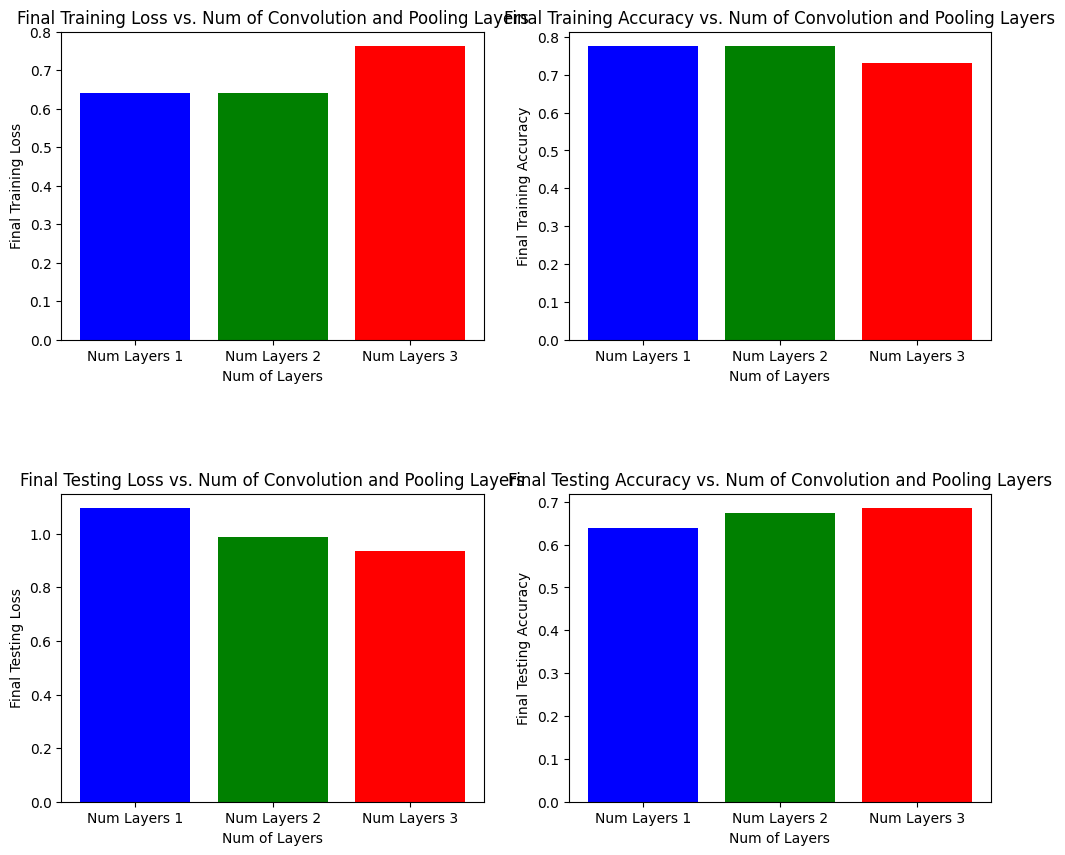

In [ ]:
# Create bar charts for final metrics
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

metrics = ['Final Training Loss', 'Final Training Accuracy', 'Final Testing Loss', 'Final Testing Accuracy']

for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    values = [results[key][metric] for key in results]
    ax.bar(results.keys(), values, color=['#87CEEB', '#90EE90', '#FFA07A', '#9370DB'])
    ax.set_xlabel('Num of Layers')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} vs. Num of Convolution and Pooling Layers')

plt.show()